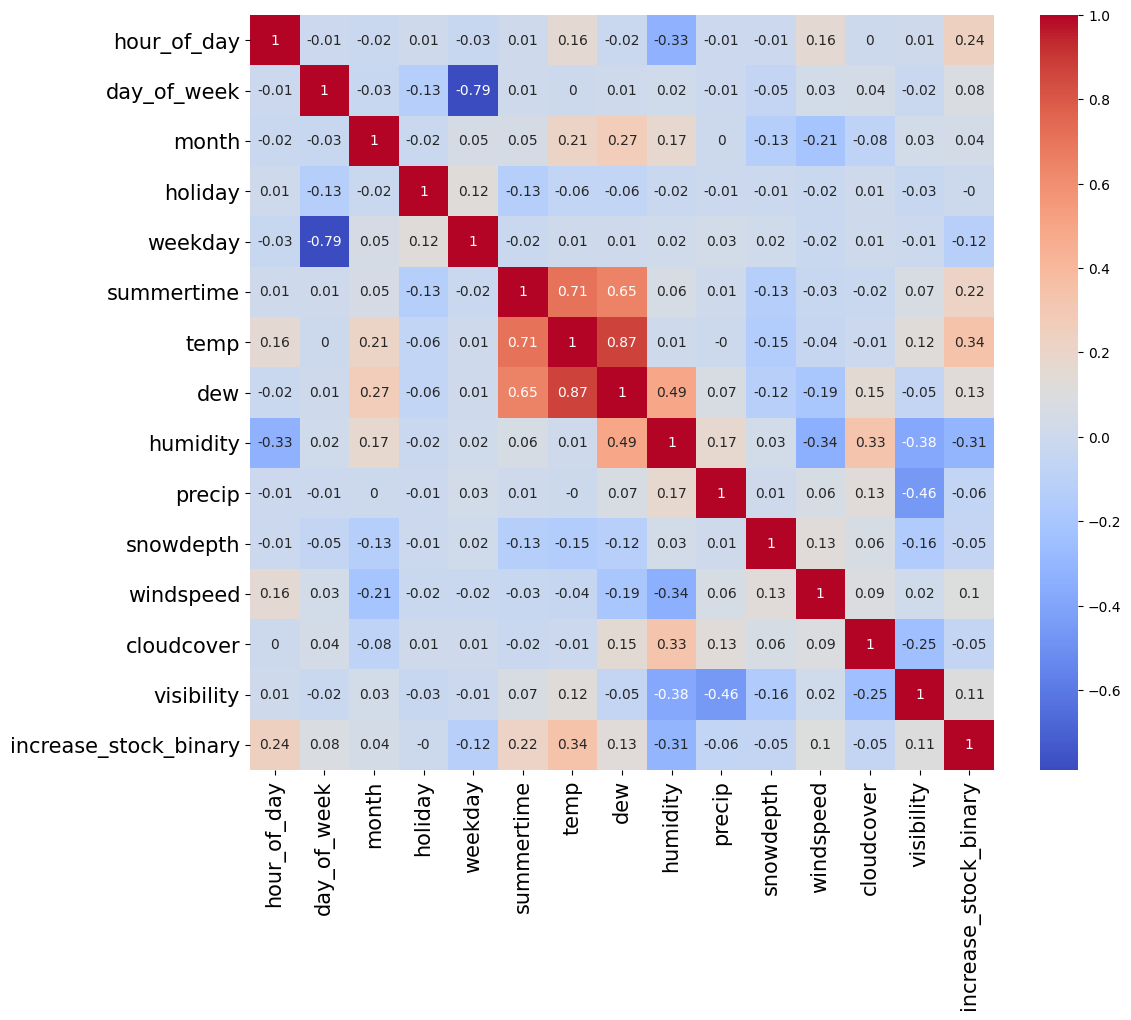

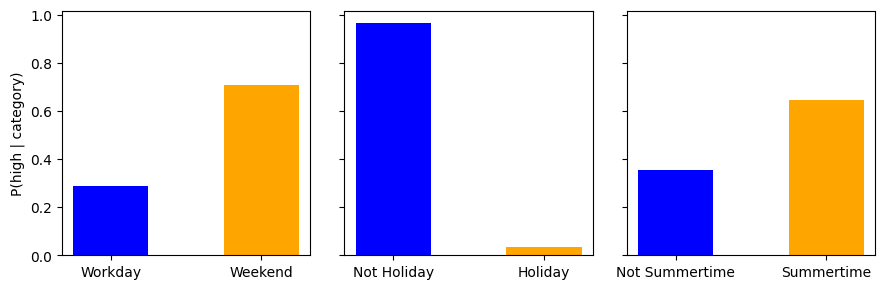

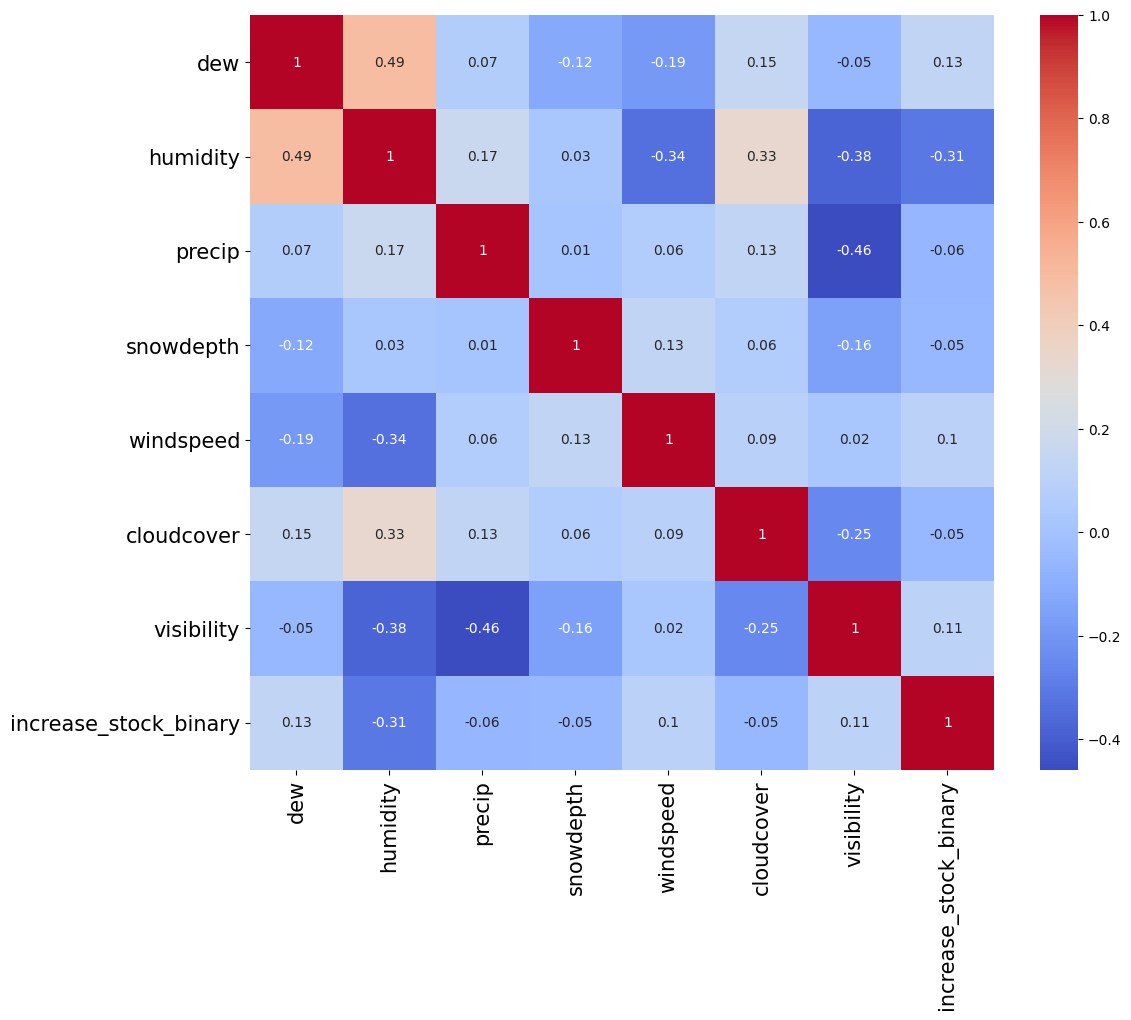

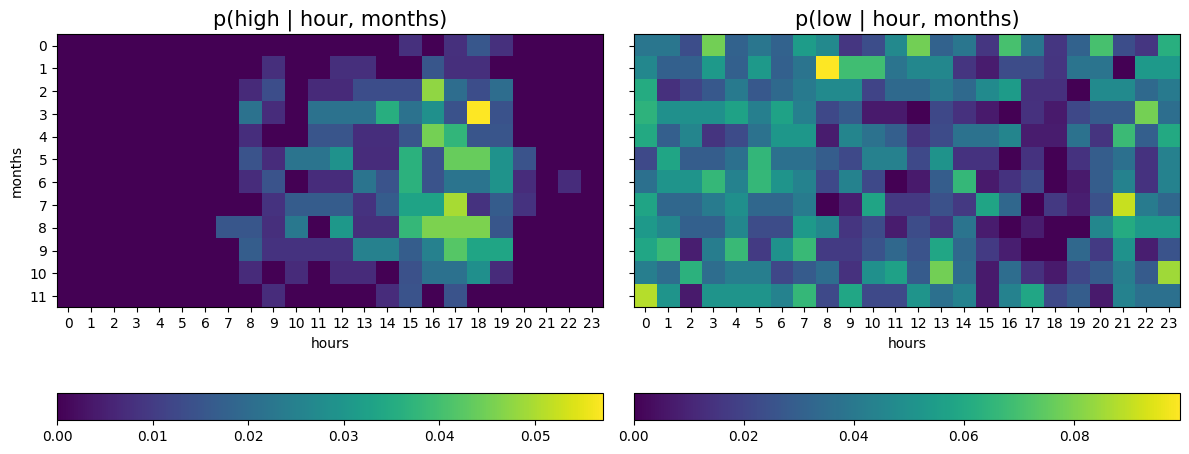

In [3]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["figure.dpi"] = 100

# Load the dataset
file_path = "training_data.csv" #'Algorithms/training_data.csv'
data = pd.read_csv(file_path)
data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)
data = data.drop(["increase_stock", "snow"], axis=1)
# Display the first few rows of the dataframe

plt.figure(figsize=(12, 10), dpi=100)
sns.heatmap(data.corr().round(2), annot=True, cmap='coolwarm')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig("correlation matrix")
plt.show()


# Load the data
data = pd.read_csv(file_path)
data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

# Subplot 1: Weekday vs Weekend
data_weekday = data["weekday"]
counts_weekday = np.bincount(data_weekday)
probabilities_weekday = counts_weekday / len(data_weekday)

# Subplot 2: Holiday vs Not holiday
data_holiday = data["holiday"]
counts_holiday = np.bincount(data_holiday)
probabilities_holiday = counts_holiday / len(data_holiday)

# Subplot 3: Summertime vs Not summertime
data_summertime = data["summertime"]
counts_summertime = np.bincount(data_summertime)
probabilities_summertime = counts_summertime / len(data_summertime)

# Creating subplots
fig, axs = plt.subplots(1, 3, figsize=(9, 3), dpi=100, sharey=True)

# Subplot 1: Weekday vs Weekend
axs[0].bar([0, 1], probabilities_weekday, width=0.5, color=['blue', 'orange'])
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(["Workday", "Weekend"])
axs[0].set_ylabel('P(high | category)')


# Subplot 2: Holiday vs Not holiday
axs[1].bar([0, 1], probabilities_holiday, width=0.5, color=['blue', 'orange'])
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(["Not Holiday", "Holiday"])

# Subplot 3: Summertime vs Not summertime
axs[2].bar([0, 1], probabilities_summertime, width=0.5, color=['blue', 'orange'])
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(["Not Summertime", "Summertime"])

# Adjust the layout
plt.tight_layout()
#plt.savefig("p(high|three category)")
plt.show()

data = pd.read_csv(file_path)
data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

# List of weather features
weather_features = ['dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 'visibility', 'increase_stock_binary']


plt.figure(figsize=(12, 10), dpi=100)
sns.heatmap(data[weather_features].corr().round(2), annot=True, cmap='coolwarm')
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15, rotation=0)
#plt.savefig("weather correlation matrix")
plt.show()

temporal_data = data[["hour_of_day", "weekday", "month", "increase_stock_binary"]]
temporal_data.head()
hour = temporal_data["hour_of_day"].to_numpy()
weekday = temporal_data["weekday"].to_numpy()
demand = temporal_data["increase_stock_binary"].to_numpy()
p_total_low = []
p_total_high = []


for i in range(1,13):
    hour = temporal_data[temporal_data["month"]==i]["hour_of_day"].to_numpy()
    demand = temporal_data[temporal_data["month"]==i]["increase_stock_binary"].to_numpy()
    P_cond_low = (hour[:,None] == np.arange(24)) * (demand[:,None] == 0)
    P_cond_high = (hour[:,None] == np.arange(24)) * (demand[:,None] == 1)

    P_cond_low = P_cond_low.astype(float)
    P_cond_high = P_cond_high.astype(float)

    p_total_low.append(P_cond_low.mean(0))
    p_total_high.append(P_cond_high.mean(0))

p_total_low = np.array(p_total_low)
p_total_high = np.array(p_total_high)    

fig, ax = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True, sharey=True, sharex=True)

ax[0].set_title("p(high | hour, months)", fontsize=15)
ax[1].set_title("p(low | hour, months)", fontsize=15)

high = ax[0].imshow(p_total_high)
low = ax[1].imshow(p_total_low)

for i in range(2):
    ax[i].set_xticks(np.arange(24))
    ax[i].set_yticks(np.arange(12))
    ax[i].set_xlabel("hours", fontsize=10)
ax[0].set_ylabel("months", fontsize=10)
    
fig.colorbar(high, ax=ax[0], location='bottom')
fig.colorbar(low, ax=ax[1], location='bottom')

#plt.savefig("conditional probability given hour and months", bbox_inches="tight")
plt.show()